In [1]:
import numpy as np
import h5py
import treecorr
import pandas as pd
import pylab as mplot
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
## DES Y1 public download
from astropy.table import Table
data = Table.read('psf_y1a1-v13-jj.fits', format='fits')

In [3]:
data

ra,dec,x,y,e1,e2,size,psf_e1,psf_e2,psf_size,exp,ccd,fov_x,fov_y,filter,tiling
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bytes1,int16
-35.0833740234375,-51.4946174621582,1385.0888671875,289.1025695800781,-0.026112141087651253,-0.01467164047062397,0.4950573742389679,-0.01641884073615074,0.007252953015267849,0.4982171952724457,228725.0,1.0,-3166.0232306050625,-1582.7946948801678,g,4
-35.07847595214844,-51.47761917114258,1151.427734375,327.7016296386719,-0.026058707386255264,0.01991906575858593,0.508821964263916,-0.01618172787129879,0.008198064751923084,0.4987098276615143,228725.0,1.0,-3227.476111210124,-1572.6431374028525,g,4
-35.062530517578125,-51.522212982177734,1761.6644287109375,471.9386901855469,-0.01253590453416109,0.004537064582109451,0.5017954707145691,-0.01815333031117916,0.004876724909991026,0.500004231929779,228725.0,1.0,-3066.9838820027676,-1534.7087954953513,g,4
-34.96010208129883,-51.518062591552734,1695.4520263671875,1343.9967041015625,-0.018433665856719017,0.0073102801106870174,0.49760177731513977,-0.020236916840076447,0.005128225777298212,0.5036634206771851,228725.0,1.0,-3084.3977264292403,-1305.3575388387046,g,4
-34.95635223388672,-51.404014587402344,130.62265014648438,1357.517578125,-0.04054722934961319,-0.019233662635087967,0.5076663494110107,-0.01984431967139244,0.007709133438766003,0.5130198001861572,228725.0,1.0,-3495.9478432622914,-1301.8015650227865,g,4
-34.950782775878906,-51.417930603027344,320.92840576171875,1407.2703857421875,-0.019807474687695503,0.008375069126486778,0.5031841993331909,-0.01899109035730362,0.008055000565946102,0.5109618306159973,228725.0,1.0,-3445.897435304261,-1288.716543177287,g,4
-34.94122314453125,-51.527347564697266,1821.33935546875,1506.3699951171875,-0.04304871708154678,0.024985209107398987,0.5079672336578369,-0.021632498130202293,0.004381798207759857,0.5040193796157837,228725.0,1.0,-3051.2893669016526,-1262.6533806915284,g,4
-34.93510055541992,-51.45646286010742,848.0923461914062,1547.2144775390625,-0.0174381323158741,0.0073209600523114204,0.5098611116409302,-0.01816648617386818,0.008096745237708092,0.506793200969696,228725.0,1.0,-3307.2533162958784,-1251.9112844899496,g,4
-34.92000961303711,-51.483848571777344,1222.60791015625,1680.218017578125,-0.029829636216163635,0.02738025411963463,0.49603331089019775,-0.01906139776110649,0.007289195898920298,0.5050904750823975,228725.0,1.0,-3208.7557477203372,-1216.931366836548,g,4


In [4]:
## data yuuki cross-matched using ra/dec with Y3
## successfully matched 76% of sources to within <0.25"

data_matched= np.load('/global/cfs/cdirs/lsst/groups/WL/users/yomori/scratch/psf_y1a1-v13_matchedY3mags.npz')

In [5]:
idx = np.where(data_matched['match_mag']<20)[0]

In [6]:
np.size(idx)

6450157

In [7]:
#rho 1 DES Y1
corr1 = treecorr.GGCorrelation(bin_size=0.2,min_sep= 0.5,max_sep= 300.0, sep_units="arcmin", bin_slop=0.1)
cat1 = treecorr.Catalog(ra=data['ra'], dec=data['dec'], g1=data['e1']-data['psf_e1'], g2=data['e2']-data['psf_e2'], ra_units="deg", dec_units="deg")
corr1.process(cat1)
print(corr1.meanr)
print(corr1.xip)
print(corr1.varxip**0.5)

[  0.55708523   0.68038546   0.83086378   1.01463025   1.23917636
   1.51342132   1.84836785   2.25731992   2.75686078   3.3669325
   4.11207611   5.0220396    6.13350193   7.49080768   9.15048811
  11.17243062  13.64529977  16.66480282  20.35390253  24.85522413
  30.35833892  37.07382923  45.27345537  55.2885965   67.51969991
  82.45245564 100.68958006 122.96433062 150.15157332 183.352424
 223.88817458 273.39230698]
[ 2.86097478e-06  2.67627855e-06  2.74480922e-06  2.24582819e-06
  2.13571106e-06  1.93509738e-06  1.60255746e-06  1.29917162e-06
  7.99540457e-07  5.07944118e-07  2.58178163e-07  7.25060023e-08
 -8.84638100e-09  3.51784299e-08  6.23620245e-08  7.19577692e-08
  5.54161322e-08  5.16115509e-08  5.56584699e-08  5.11151626e-08
  5.48549668e-08  4.91828941e-08  5.86449799e-08  5.81048338e-08
  5.56740150e-08  5.42955197e-08  5.39122075e-08  5.32553276e-08
  5.31629834e-08  5.21557655e-08  5.04699259e-08  5.00434339e-08]
[1.40266591e-07 1.15119900e-07 9.45575621e-08 7.77342551e-

In [8]:
#rho 1 DES Y1 matched with DES Y3
corr1_matched = treecorr.GGCorrelation(bin_size=0.2,min_sep= 0.5,max_sep= 300.0, sep_units="arcmin", bin_slop=0.1)
cat1_matched = treecorr.Catalog(ra=data['ra'][idx], dec=data['dec'][idx], g1=data['e1'][idx]-data['psf_e1'][idx], g2=data['e2'][idx]-data['psf_e2'][idx], ra_units="deg", dec_units="deg")
corr1_matched.process(cat1_matched)
print(corr1_matched.meanr)
print(corr1_matched.xip)
print(corr1_matched.varxip**0.5)


[  0.55708426   0.68041535   0.83083348   1.0146554    1.23922187
   1.51344453   1.84837807   2.25736128   2.75676082   3.36680641
   4.11175357   5.02175888   6.13318604   7.49054886   9.15064187
  11.17199272  13.64514708  16.66472739  20.35419755  24.85475158
  30.358949    37.07400996  45.27312145  55.28846784  67.5206764
  82.45330965 100.69112394 122.96809003 150.15588216 183.35851391
 223.90082854 273.40606515]
[2.30895796e-06 2.34183439e-06 2.34753420e-06 2.07642171e-06
 1.88249398e-06 1.68409752e-06 1.30195688e-06 1.14561278e-06
 7.54309555e-07 5.26653067e-07 2.42751886e-07 5.87748102e-08
 2.31370313e-09 6.01937965e-08 7.71200300e-08 9.37462697e-08
 7.04448960e-08 6.93712675e-08 6.70582522e-08 7.20353563e-08
 7.47602138e-08 6.22430277e-08 6.55984999e-08 6.53871451e-08
 6.29844763e-08 6.23320730e-08 6.29961858e-08 6.03117752e-08
 5.75594194e-08 5.39358123e-08 5.05135224e-08 4.68871754e-08]
[1.80845986e-07 1.48234400e-07 1.21996680e-07 1.00207650e-07
 8.24605952e-08 6.77818969e

Text(0.5, 1.0, 'rho1')

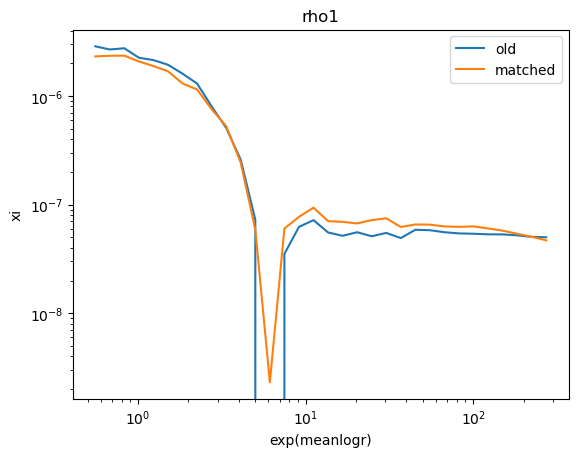

In [10]:
mplot.loglog(np.exp(corr1.meanlogr), corr1.xip, label = 'old')
mplot.loglog(np.exp(corr1_matched.meanlogr), corr1_matched.xip, label = 'matched')
mplot.legend()
mplot.ylabel('xi')
mplot.xlabel('exp(meanlogr)')
mplot.title('rho1')

In [11]:
#rho 2 DES Y1
corr2 = treecorr.GGCorrelation(bin_size=0.2,min_sep= 0.5,max_sep= 300.0, sep_units="arcmin", bin_slop=0.1)
cat1 = treecorr.Catalog(ra=data['ra'], dec=data['dec'], g1=data['e1'], g2=data['e2'], ra_units="deg", dec_units="deg")
cat2 = treecorr.Catalog(ra=data['ra'], dec=data['dec'], g1=data['e1']-data['psf_e1'], g2=data['e2']-data['psf_e2'], ra_units="deg", dec_units="deg")
corr2.process(cat1, cat2)
print(corr2.meanr)
print(corr2.xip)
print(corr2.varxip**0.5)

[  0.55708523   0.68038546   0.83086378   1.01463025   1.23917636
   1.51342132   1.84836785   2.25731992   2.75686078   3.3669325
   4.11207611   5.0220396    6.13350193   7.49080768   9.15048811
  11.17243062  13.64529977  16.66480282  20.35390253  24.85522413
  30.35833892  37.07382923  45.27345537  55.2885965   67.51969991
  82.45245564 100.68958006 122.96433062 150.15157331 183.35242399
 223.88817458 273.39230698]
[1.56772140e-06 1.60460233e-06 1.63482875e-06 1.04560909e-06
 1.25054584e-06 1.09777128e-06 8.35945520e-07 8.15159555e-07
 2.90972297e-07 2.13408212e-07 1.92825790e-07 1.90251113e-07
 2.48748588e-07 3.40132198e-07 4.18592838e-07 4.47005816e-07
 4.61233464e-07 5.20996542e-07 5.53213657e-07 5.96625066e-07
 5.77789347e-07 5.77601411e-07 5.71073164e-07 6.05883799e-07
 6.58584075e-07 6.66740409e-07 7.16648124e-07 6.98187487e-07
 7.21927933e-07 6.99254018e-07 7.04899940e-07 7.33772830e-07]
[1.91319918e-07 1.57020497e-07 1.28974012e-07 1.06027467e-07
 8.71317384e-08 7.15472944e

In [12]:
#rho 2 DES Y1 matched with DES Y3
corr2_matched = treecorr.GGCorrelation(bin_size=0.2,min_sep= 0.5,max_sep= 300.0, sep_units="arcmin", bin_slop=0.1)
cat1_matched = treecorr.Catalog(ra=data['ra'][idx], dec=data['dec'][idx], g1=data['e1'][idx], g2=data['e2'][idx], ra_units="deg", dec_units="deg")
cat2_matched = treecorr.Catalog(ra=data['ra'][idx], dec=data['dec'][idx], g1=data['e1'][idx]-data['psf_e1'][idx], g2=data['e2'][idx]-data['psf_e2'][idx], ra_units="deg", dec_units="deg")
corr2_matched.process(cat1_matched, cat2_matched)
print(corr2_matched.meanr)
print(corr2_matched.xip)
print(corr2_matched.varxip**0.5)

[  0.55708426   0.68041535   0.83083348   1.0146554    1.23922187
   1.51344453   1.84837807   2.25736128   2.75676082   3.36680641
   4.11175357   5.02175888   6.13318604   7.49054886   9.15064187
  11.17199272  13.64514708  16.66472739  20.35419755  24.85475158
  30.358949    37.07400996  45.27312145  55.28846784  67.5206764
  82.45330965 100.69112394 122.96809003 150.15588216 183.35851392
 223.90082854 273.40606515]
[-1.17415764e-06 -1.04986022e-06 -7.76958487e-07 -9.17034049e-07
 -1.00525374e-06 -1.07153472e-06 -1.68533751e-06 -1.47430552e-06
 -1.76650820e-06 -1.76632563e-06 -1.80611614e-06 -1.71958658e-06
 -1.60924104e-06 -1.48511072e-06 -1.40062901e-06 -1.35511938e-06
 -1.25942057e-06 -1.11755315e-06 -1.01913320e-06 -9.43334544e-07
 -9.04350432e-07 -9.01056612e-07 -9.18323742e-07 -8.51105352e-07
 -7.46703938e-07 -7.31840210e-07 -7.55224468e-07 -7.41288578e-07
 -6.72551021e-07 -6.68451663e-07 -6.51080286e-07 -6.03963938e-07]
[3.03966409e-07 2.49152770e-07 2.05052342e-07 1.68429282

Text(0.5, 1.0, 'rho2')

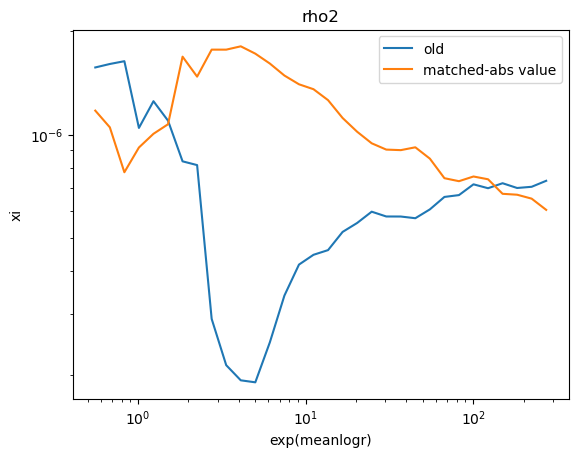

In [14]:
mplot.loglog(np.exp(corr2.meanlogr), corr2.xip,label='old')
mplot.loglog(np.exp(corr2_matched.meanlogr), np.abs(corr2_matched.xip),label='matched-abs value')
mplot.legend()
mplot.ylabel('xi')
mplot.xlabel('exp(meanlogr)')
mplot.title('rho2')